# INF-0616 - Aula 1: Linear Regression

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Alana Santana -- alana.correia@ic.unicamp.br
           Hudson Bruno -- hudson.bruno@ic.unicamp.br

Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina: 
[moodle.lab.ic.unicamp.br/456](https://moodle.lab.ic.unicamp.br/moodle/course/view.php?id=456)

Instituto de Computação - Unicamp 2021

## 1. Inspect data

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

nutri_data = pd.read_csv('nutrition_train.data')
nutri_data.describe() 

,totalFat,saturatedFat,cholesterol,sodium,choline,folate,folicAcid,niacin,pantothenicAcid,riboflavin,...,saturatedFattyAcids,monounsaturatedFattyAcids,polyunsaturatedFattyAcids,fattyAcidsTotalTrans,alcohol,ash,caffeine,theobromine,water,calories
count,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,...,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000,5272.000000
mean,10.371074,3.212140,28.303869,363.396813,17.416464,49.101480,17.329097,2.819827,0.435921,0.223343,...,3.212129,3.533956,2.411424,28.303869,0.147989,1.875076,3.425645,5.606601,51.904545,231.582701
std,16.837592,6.698157,100.467259,1167.402396,54.241424,132.860466,102.733871,4.662728,1.083152,0.454160,...,6.695242,7.099077,5.591744,100.467259,1.663644,3.445901,99.016276,67.379387,33.318642,183.068439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.100000,0.000000,16.000000,0.000000,2.000000,0.000000,0.234000,0.000000,0.037000,...,0.061000,0.029000,0.078000,0.000000,0.000000,0.640000,0.000000,0.000000,11.500000,77.000000
50%,3.600000,0.800000,0.000000,130.000000,0.000000,11.000000,0.000000,1.267500,0.197000,0.120000,...,0.847000,0.881000,0.600000,0.000000,0.000000,1.290000,0.000000,0.000000,62.525000,187.000000
75%,14.000000,3.500000,28.000000,466.000000,16.700000,47.000000,0.000000,3.800000,0.528000,0.250000,...,3.531250,4.300000,2.330000,28.000000,0.000000,2.290000,0.000000,0.000000,81.240000,361.000000
max,100.000000,96.000000,3010.000000,38758.000000,2403.300000,3786.000000,2993.000000,127.500000,33.600000,17.500000,...,95.600000,83.689000,74.623000,3010.000000,37.900000,99.800000,5714.000000,2634.000000,100.000000,902.000000


intercept: 434.8483422248688
slope: [ 8.5384123  -0.0118622   2.46116725 -4.39283503  0.05608793]


'Accuracy: 92%'

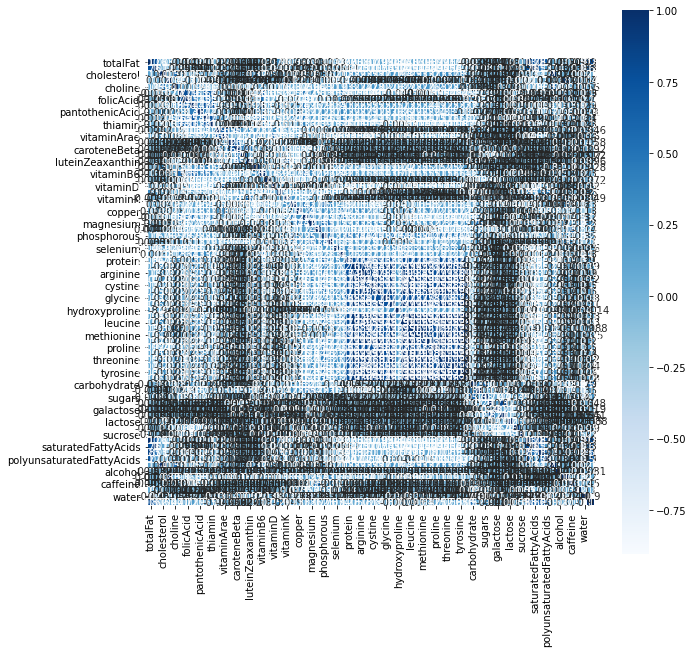

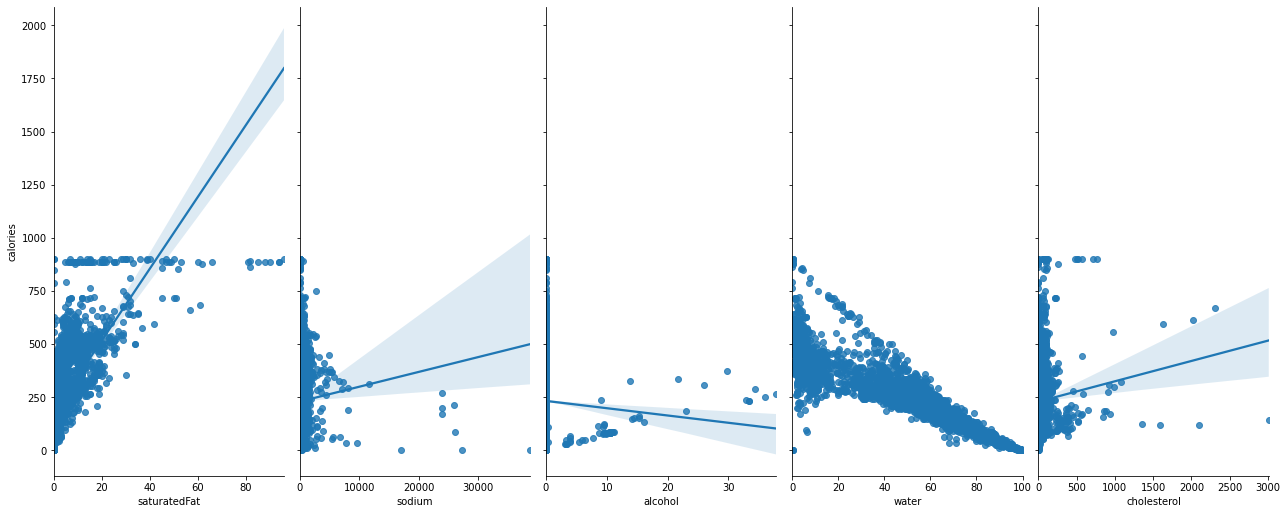

In [ ]:
correlation = nutri_data.corr()

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')
features = ['saturatedFat', 'sodium', 'alcohol', 'water','cholesterol']
x = nutri_data[features]
y = nutri_data['calories']

# plotting features vs calories

sns.pairplot(nutri_data,x_vars=features,y_vars='calories',kind='reg',height=7,aspect=0.5)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

regressor = LinearRegression()
regressor.fit(x_train,y_train)
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))